<a href="https://colab.research.google.com/github/anastasiiaCher/pyad-2024/blob/main/lab1/PY%D0%90%D0%94_%D0%9B%D0%A01_PySpark_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Данные

Об авиаперевозках с 1987 года: https://www.transtats.bts.gov/Tables.asp?QO_VQ=EFD&QO_anzr=Nv4yv0r%FDb0-gvzr%FDcr4s14zn0pr%FDQn6n&QO_fu146_anzr=b0-gvzr

Ниже скачиваются только данные за часть 2023 и 2024 годов.

In [2]:
!gdown 1NQuold7jvGZfHikbvtj0QynbhM90pT8L
!gdown 1HNAGhPHE6BmamcI0D767-BFhF4BWs6Hh
!gdown 1ERgltJRuybLl7sIUUVckzpUVzyP1ttCq
!gdown 1XrUk6ZYwQLQTjtsMHKxzzERP4dCLMEao
!gdown 1qy95Qpd93VClYPethMtMDJdAMBl21fnW
!gdown 1js5pbc_xe6kP7W4_lp6HaeXR0oAw2ZDL
!gdown 1qb4_uKGy0KU_4jRzaauqeObaaCQMtdBZ
!gdown 1TuC71TgrJDgpOvQVKl9jn89fAr9El1Pa
!gdown 1nt7e9Pszf2-IB3GsKHNRHZ_SPzxS0E2L
!gdown 1V5tCiD9jRCss0KoJxk-r1zOCw3onwez3
!gdown 1WsKGiVBV2p-sgiDePT6HZKUezWPc2zUH

Downloading...
From: https://drive.google.com/uc?id=1NQuold7jvGZfHikbvtj0QynbhM90pT8L
To: /content/T_ONTIME_REPORTING.csv
100% 67.6M/67.6M [00:00<00:00, 201MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HNAGhPHE6BmamcI0D767-BFhF4BWs6Hh
To: /content/T_ONTIME_REPORTING 2.csv
100% 66.4M/66.4M [00:00<00:00, 234MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ERgltJRuybLl7sIUUVckzpUVzyP1ttCq
To: /content/T_ONTIME_REPORTING 3.csv
100% 61.6M/61.6M [00:00<00:00, 87.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XrUk6ZYwQLQTjtsMHKxzzERP4dCLMEao
To: /content/T_ONTIME_REPORTING 4.csv
100% 71.8M/71.8M [00:00<00:00, 133MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qy95Qpd93VClYPethMtMDJdAMBl21fnW
To: /content/T_ONTIME_REPORTING 5.csv
100% 69.3M/69.3M [00:00<00:00, 265MB/s]
Downloading...
From: https://drive.google.com/uc?id=1js5pbc_xe6kP7W4_lp6HaeXR0oAw2ZDL
To: /content/T_ONTIME_REPORTING 6.csv
100% 71.1M/71.1M [00:00<00:00, 80.7MB/s]
Downloading...
F

#### Основные функции PySpark

В отдельном колабе: https://colab.research.google.com/drive/1noKypPI5ymbofp0YPtRH9gYSqNPAiTAT?usp=sharing

### Пример работы с PySpark
Для работы с PySpark мы можем использовать SparkSession для создания сессии и работы с большими данными.

In [3]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.5.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.5.tgz
!tar xf spark-3.5.3-bin-hadoop3.5.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,372 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 https://de

In [4]:
df = spark.read.csv('/content/T_ONTIME_REPORTING.csv', header=True, inferSchema=True)
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 2.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 3.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 4.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 5.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 6.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 7.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 8.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 9.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 10.csv', header=True, inferSchema=True))

df.show()

+----+--------------------+-----------------+-----------------+------+--------------------+---------------+----+--------------------+---------+---------+---------+-------------------+--------+-------------+-------------+---------+--------------+-------------------+
|YEAR|             FL_DATE|OP_UNIQUE_CARRIER|ORIGIN_AIRPORT_ID|ORIGIN|    ORIGIN_CITY_NAME|DEST_AIRPORT_ID|DEST|      DEST_CITY_NAME|DEP_DELAY|ARR_DELAY|CANCELLED|ACTUAL_ELAPSED_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|
+----+--------------------+-----------------+-----------------+------+--------------------+---------------+----+--------------------+---------+---------+---------+-------------------+--------+-------------+-------------+---------+--------------+-------------------+
|2024|1/1/2024 12:00:00 AM|               9E|            10135|   ABE|Allentown/Bethleh...|          10397| ATL|         Atlanta, GA|     -2.0|    -35.0|      0.0|              119.0|   692.0|         N

## Задание 1

1. Сколько различных перевозчиков представлено в датасете?
2. Какие 5 перевозчиков сделали наибольшее число перелетов?

Могут понадобиться методы:
- dropDuplicates()
- select()
- groupBy()
- orderBy()
- limit()
- count()

In [5]:
# put your code here

## Задание 2

Найдите 10 самых частых направлений, если:
- Направление – это пара «аэропорт вылета-аэропорт прилета»
- Направление – это пара «город вылета-город прилета»
- Направление – это город прилета.


Могут понадобиться методы:
- groupBy()
- orderBy()
- limit()
- count()

In [6]:
# put your code here

## Задание 3

1. Узнайте, сколько было отмен рейсов в каждом месяце. Отсортируйте ответ по числу отмен.
2. Для каждого месяца определите причину задержки, из-за которой было отложено больше всего рейсов.

Могут понадобиться методы/функции:
- withColumn()
- split()
- getItem()
- cast()
- groupBy()
- orderBy()
- sum()
- isNotNull()
- col()
- when()
- otherwise()
- agg()
- greatest()

In [7]:
from pyspark.sql.functions import split, when, col, greatest

# put your code here

## Задание 4

Создайте и обучите модель логистической регрессии для предсказания отмены рейса.

Закодируйте категориальные признаки в one-hot формат: разбейте столбец из $n$ категорий на $n$ столбцов, где в каждой строке $1$ будет стоять в том столбце, название которого раньше было категорией, к которой относится этот объект.

Сначала закодируем таким образом столбец с перевозчиком (`OP_UNIQUE_CARRIER`).

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

carr_indexer = StringIndexer(inputCol="OP_UNIQUE_CARRIER", outputCol="carrier_index")
carr_encoder = OneHotEncoder(inputCol="carrier_index", outputCol="carrier_fact")

Столбцы `ORIGIN` (пункт вылета) и `DEST` (пункт прилета) закодируйте аналогично самостоятельно.

In [ ]:
# put your code here

Выделите целевую переменную. Ее важно назвать `label`. По этому названию дальше метод `fit()` отличит ее от других столбцов. Целевая переменная должна получиться из значений столбца `CANCELLED` (отмена рейса).

In [ ]:
df3 = df3.withColumn("label", # put your code here)

Соберите все признаки, которые будут использоваться для обучения, в один вектор `features`.

In [ ]:
from pyspark.ml.feature import VectorAssembler

vec_assembler = VectorAssembler(inputCols=["DATE", "DISTANCE", "carrier_fact", "dest_fact", "origin_fact"], outputCol="features")

Объедините все предобработки в один пайплайн. Он будет состоять из кодирования категориальных переменных и объединения новых столбцов с некоторыми старыми в матрицу признаков.

In [ ]:
from pyspark.ml import Pipeline

flights_pipe = Pipeline(stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, origin_indexer, origin_encoder, vec_assembler])

Выполните созданный пайплайн.

In [ ]:
piped_data = flights_pipe.fit(df3).transform(df3)

Разделите датасет на тренировочную и тестовую выборки.

In [ ]:
training, test = piped_data.randomSplit([.7, .3])

Создайте модель – логистическую регрессию.

In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression()

Введите метрику оценки качества предсказания – ROC-AUC. Метрика рассчитывается на основе матрицы неточностей. Чем ближе она к 1, тем качественнее классификатор. Значение 0.5 означает, что предсказания случайны.

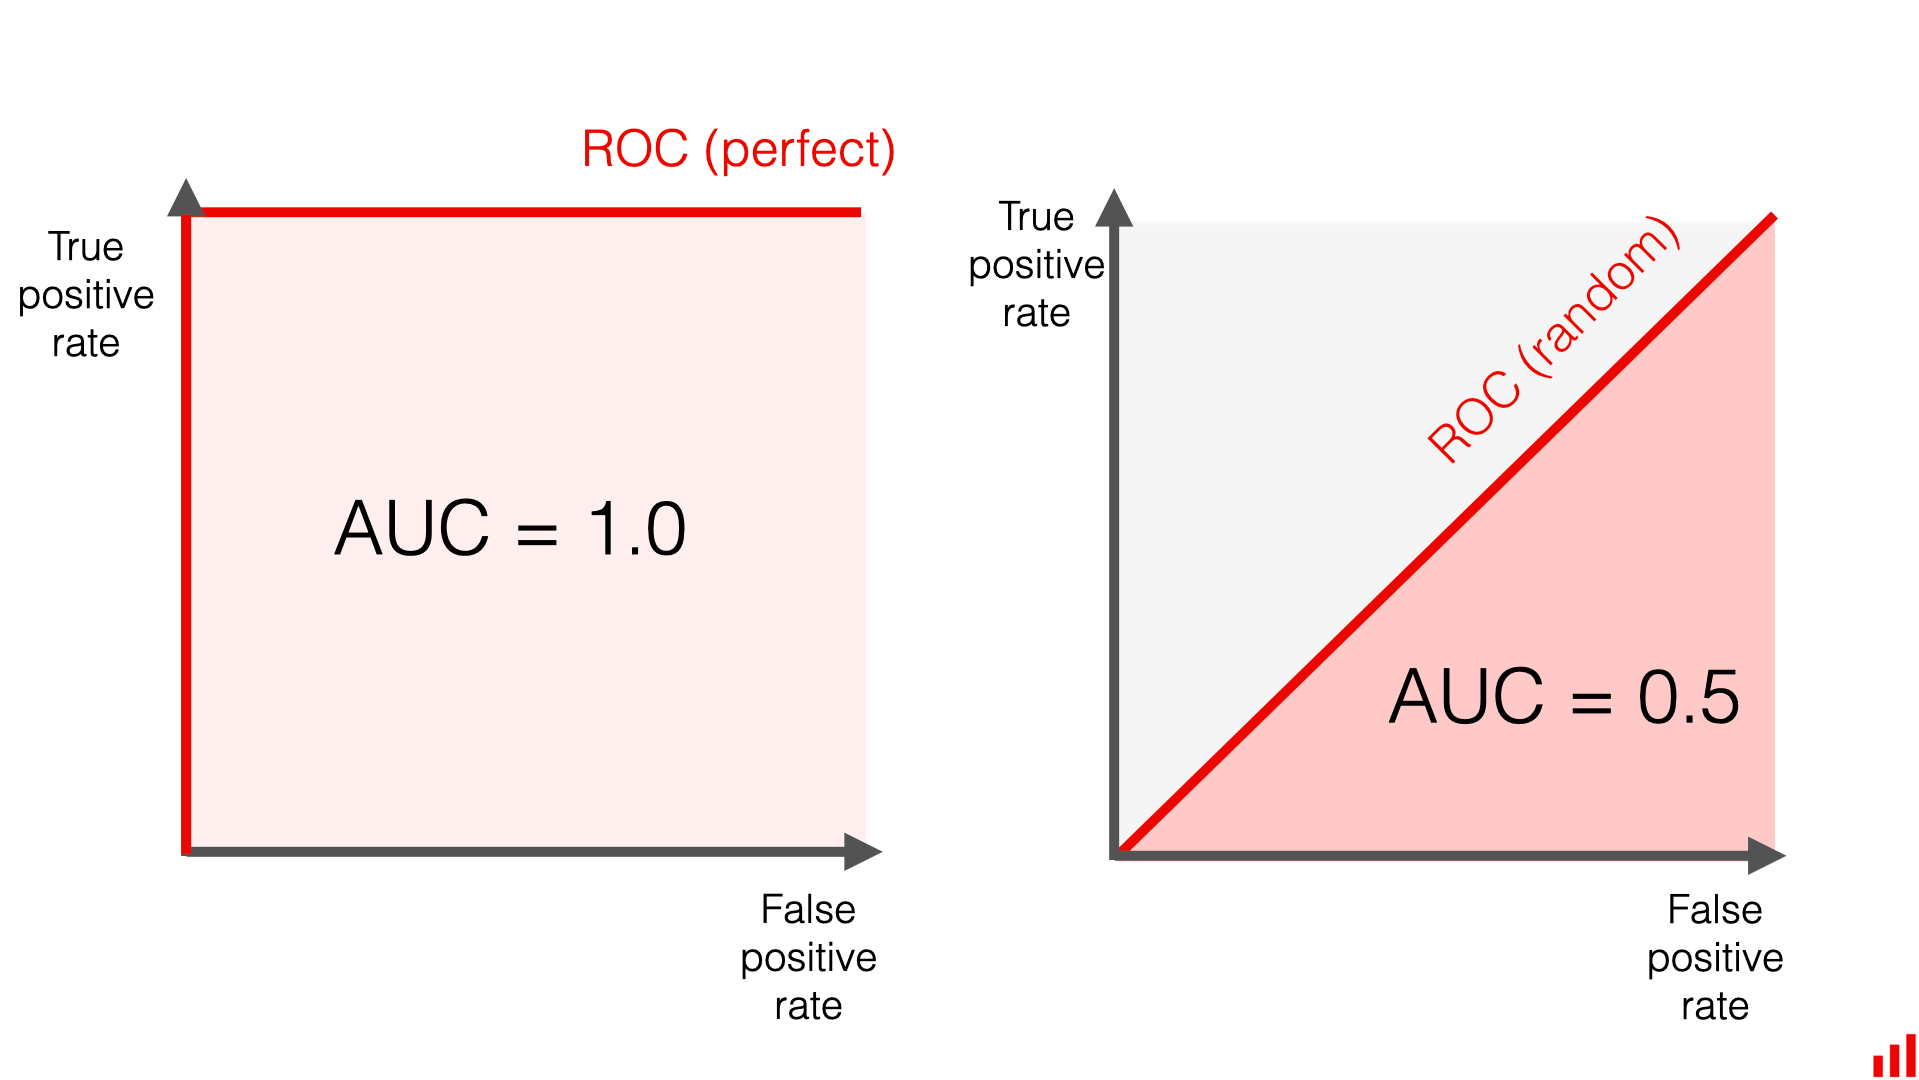

In [ ]:
import pyspark.ml.evaluation as evals

evaluator = evals.BinaryClassificationEvaluator(metricName="areaUnderROC")

Обучите модель.

In [ ]:
model = lr.fit(training)
print(model)

LogisticRegressionModel: uid=LogisticRegression_0025f2eda729, numClasses=2, numFeatures=712


Протестируйте модель.

In [ ]:
test_results = model.transform(test)
print(evaluator.evaluate(test_results))

0.6661175113350906


Точность классификатора – чуть меньше 0.7. Результат посредственный. Проведите несколько экспериментов с предобработкой и ответьте на следующие вопросы:
1. Повысится ли качество, если не использовать данные о пункте вылета?
2. Повысится ли качество, если не использовать данные о пункте прилета?
3. Повысится ли качество, если не использовать данные о перевозчике?
4. Повысится ли качество, если не использовать данные о месяце перелета?
5. Повысится ли качество, если задать направление полета иначе (см. задание 2)?

In [ ]:
# put your code here